In [18]:
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
from torchvision import datasets
import time

In [52]:
import matplotlib.pylab as pylab

params = {'legend.fontsize': "x-large",
          'axes.labelsize': "x-large",
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}

pylab.rcParams.update(params)

In [11]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
)

In [12]:
train_x = train_data.data.numpy().reshape(60000, -1) 
train_y = train_data.targets.numpy()
test_x = test_data.data.numpy().reshape(10000, -1) 
test_y = test_data.targets.numpy()

In [44]:
data = np.concatenate([train_x, test_x], axis=0) / 255

In [45]:
labels = np.concatenate([train_y, test_y])

In [46]:
X = pd.DataFrame(data)
Y = pd.DataFrame(labels)

In [47]:
X = X.sample(frac=0.2, random_state=10).reset_index(drop=True)
Y = Y.sample(frac=0.2, random_state=10).reset_index(drop=True)

In [48]:
time_start = time.time()
tsne = TSNE(n_iter=2000)
tsne_results = tsne.fit_transform(X.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\atakan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\atakan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE done! Time elapsed: 202.7837312221527 seconds


In [49]:
X["label"] = Y

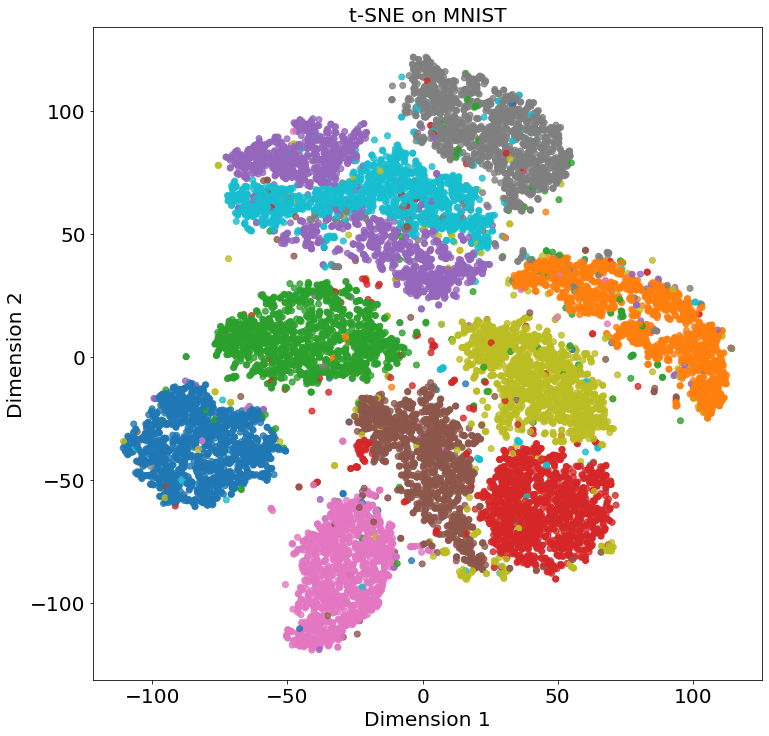

In [62]:
# Create the figure
plt.rcParams.update({'font.size': 14})

fig = plt.figure( figsize=(12,12) )
ax = fig.add_subplot(1, 1, 1, title='t-SNE on MNIST' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=X['label'], 
    cmap=plt.cm.get_cmap('tab10'), 
    alpha=0.8)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.savefig('mnist-tsne.png')